# EDA & ML: Electric Rotor Temperature Prediction


Author: Sin Yee NEO

Version: 1.0

Language: R 3.3.0 and Jupyter notebook

Libraries used:
- tidyverse
- caret
- MASS
- car
- FNN
- reshape
- ggplot2
- randomForest
- tictoc
- leaps

## Table of Contents

1. [Introduction](#sec_1)
2. [Load Data](#sec_2)
3. [Exploratory Data Analysis](#sec_3)
4. [Model Development](#sec_4)
5. [Final Model Selection](#sec_5)
6. [Conclusion](#sec_6)
7. [References](#sec_7)

## 1. Introduction <a class="anchor" id="sec_1"></a>


This notebook provides detailed data analysis on a set of data that comprises several sensor data collected from a permanent magnet synchrnous motoe (PMSM). The aim of this notebook is to make prediction on rotor temperature (pm) and find the best model among the other conducted models.

The exploratory data analysis (EDA) is presented in the first section of the notebook to anaylise and summarise the characteristic of the variables and the relationship between the variables. Statistical graphics and data visualisation techniques will be used in the section.

The second section of the notecook will be the development of regression model. The process in building the model will be presented in this section in detail. Each model will be compared with explaination and the best one will be selected. The models are:

* Least squared regression model,
* Ridge regression model,
* Lasso regression model,
* K-nearest Neighbours Regression Model (KNN), and
* Random forest model

Statistical assessments such as Adjusted R-squared and P-values will be used in the model specification process. 

Data provided for this assessment is `pmsm_temperature_data_A1_2021.csv`.

## 2. Load Data and Import Library<a class="anchor" id="sec_2"></a>

Load Data `pmsm_temperature_data_A1_2021.csv` and libraries into notebbok.

In [1]:
# install packages
install.packages("tictoc")
install.packages("leaps")

package 'tictoc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\sinye\AppData\Local\Temp\RtmpiWKZiw\downloaded_packages
package 'leaps' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\sinye\AppData\Local\Temp\RtmpiWKZiw\downloaded_packages


In [2]:
# import library
library(tidyverse)
library(caret)
library(MASS)
library(car)
library(FNN)
library(reshape)
library(ggplot2)
library('randomForest')
library(tictoc)
library(leaps)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.3.3       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
Warning message:
"package 'ggplot2' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift


Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select

Warning message:
"package 'car' was built under R version 3.6.3"Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"
Attaching package: 'car'

The following object is 

In [3]:
# load data
pmsm = read.csv("pmsm_temperature_data_A1_2021.csv", header = T)

## 3. Exploratory Data Analysis<a class="anchor" id="sec_3"></a>

### i) Overview of the training dataset

In [4]:
# dimensions of data
cat("The PMSM dataset has", dim(pmsm[,-(10:12)])[1], "rows and ", dim(pmsm[,-(10:12)])[2],
    "columns.\n\n")

# structure of data
str(pmsm[,-(10:12)])

cat("\nFive-number summary for each attribute are:")
# Five-number summary 
summary(pmsm[,-(10:12)])

cat("The numbers of unique values for each variables are:")
apply(pmsm[,-(10:12)], 2, function(x) length(unique(x)))

The PMSM dataset has 15147 rows and  10 columns.

'data.frame':	15147 obs. of  10 variables:
 $ ambient    : num  0.118 -0.555 -0.772 0.22 0.402 ...
 $ coolant    : num  -1.04 -1.09 -1.06 -1.08 -1.08 ...
 $ u_d        : num  -1.027 -1.226 0.299 -1.026 0.316 ...
 $ u_q        : num  0.925 0.513 0.956 0.928 -0.709 ...
 $ motor_speed: num  1.212 2.024 -0.14 1.212 -0.952 ...
 $ torque     : num  0.359 0.284 -0.259 0.357 -0.256 ...
 $ i_d        : num  -0.834 -1.364 1.029 -0.838 1.029 ...
 $ i_q        : num  0.323 0.234 -0.246 0.323 -0.246 ...
 $ pm         : num  -0.0883 0.7104 -1.5926 -0.1417 -1.9649 ...
 $ profile_id : int  4 4 4 4 4 4 4 4 4 4 ...

Five-number summary for each attribute are:

    ambient           coolant              u_d               u_q         
 Min.   :-3.3278   Min.   :-1.23704   Min.   :-1.6537   Min.   :-1.8146  
 1st Qu.:-0.5390   1st Qu.:-0.69087   1st Qu.:-0.4860   1st Qu.:-1.2683  
 Median :-0.1403   Median :-0.04497   Median : 0.3001   Median :-0.3806  
 Mean   :-0.1074   Mean   : 0.18125   Mean   : 0.1102   Mean   :-0.1910  
 3rd Qu.: 0.4981   3rd Qu.: 1.00946   3rd Qu.: 0.3503   3rd Qu.: 0.7410  
 Max.   : 2.7106   Max.   : 2.29464   Max.   : 2.2735   Max.   : 1.7702  
  motor_speed          torque              i_d               i_q          
 Min.   :-1.2224   Min.   :-3.31634   Min.   :-3.1764   Min.   :-3.30867  
 1st Qu.:-1.2224   1st Qu.:-0.25765   1st Qu.:-0.5524   1st Qu.:-0.24579  
 Median :-0.4318   Median :-0.25564   Median : 0.5874   Median :-0.24571  
 Mean   :-0.1913   Mean   :-0.08396   Mean   : 0.1775   Mean   :-0.08147  
 3rd Qu.: 0.6743   3rd Qu.: 0.35654   3rd Qu.: 1.0291   3rd Qu.: 0.34990  
 Max.   : 2.0241   Max.   : 3.01

The numbers of unique values for each variables are:

ambient     coolant         u_d         u_q motor_speed      torque 
      14263       14513       15126       15100        9434        9788 
        i_d         i_q          pm  profile_id 
      10484       12451       15139          52

__<span style="color:blue"> Summary of Attributes:</span>__

The following table identifies the type and sub-type of the attributes. It also shows some initial observations about the ranges and mean values of the attributes.

|Attribute  |Type       |Sub-type  |Comments                                                                              |
|-----------|-----------|----------|--------------------------------------------------------------------------------------|
|ambient    |Numerical  |Continuous|Ranges from -3.3278 to 2.7106, with the mean of -0.1074|
|coolant    |Numerical  |Continuous|Ranges from -1.23704 to 2.29464, with the mean of 0.18125| 
|u_d        |Numerical  |Continuous|Ranges from -1.6537 to 2.2735, with the mean of 0.1102       |
|u_q        |Numerical  |Continuous|Ranges from -1.8146 to 1.7702, with the mean of -0.1910|
|motor_speed|Numerical  |Continuous|Ranges from -1.2224 to 2.0241, with the mean of -0.1913                                      |
|torque     |Numerical  |Continuous|Ranges from -3.31634 to 3.01379, with the mean of -0.08396          |
|i_d        |Numerical  |Continuous|Ranges from -3.1764 to 1.0602, with the mean of 0.1775   |
|i_q        |Numerical  |Continuous|Ranges from -3.30867  to 2.91418, with the mean of -0.08147    |
|pm         |Numerical  |Continuous|Target variable - values range from -2.6052 to 2.9052, with the mean of -0.1268|
|profile_id |Numerical  |Discrete  |Values range from 4 to 81 - most of the profile_ids are around 60      |

Note that all the variables are numeric values, hence, there are no categorical data for encoding is required. 

### ii) Analyse Variable Distribution

#### Investigate the distribution of each variables with boxplots (Lan,D., 2021)


Using  as id variables


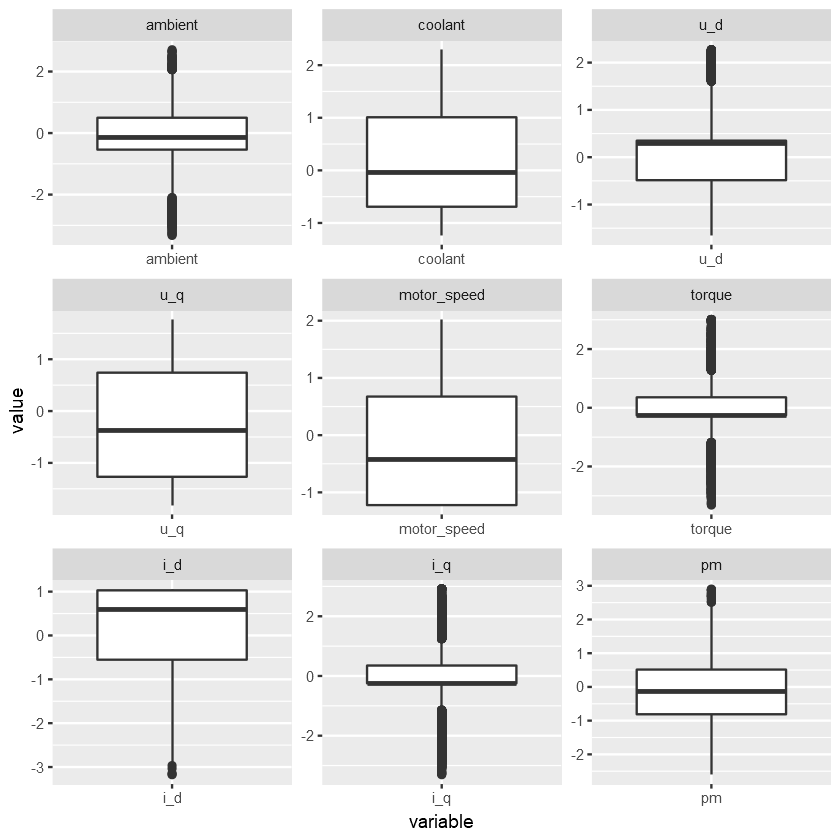

In [5]:
# Generate box plots of all predictor variables
m1 <- melt(as.data.frame(pmsm[,-(10:13)]))
ggplot(m1,aes(x = variable,y = value)) +
facet_wrap(~variable, scales="free") +
geom_boxplot() +
scale_y_continuous(labels=function (n) {format(n, scientific=FALSE)})

#### Investigate the distribution of variables with histogram

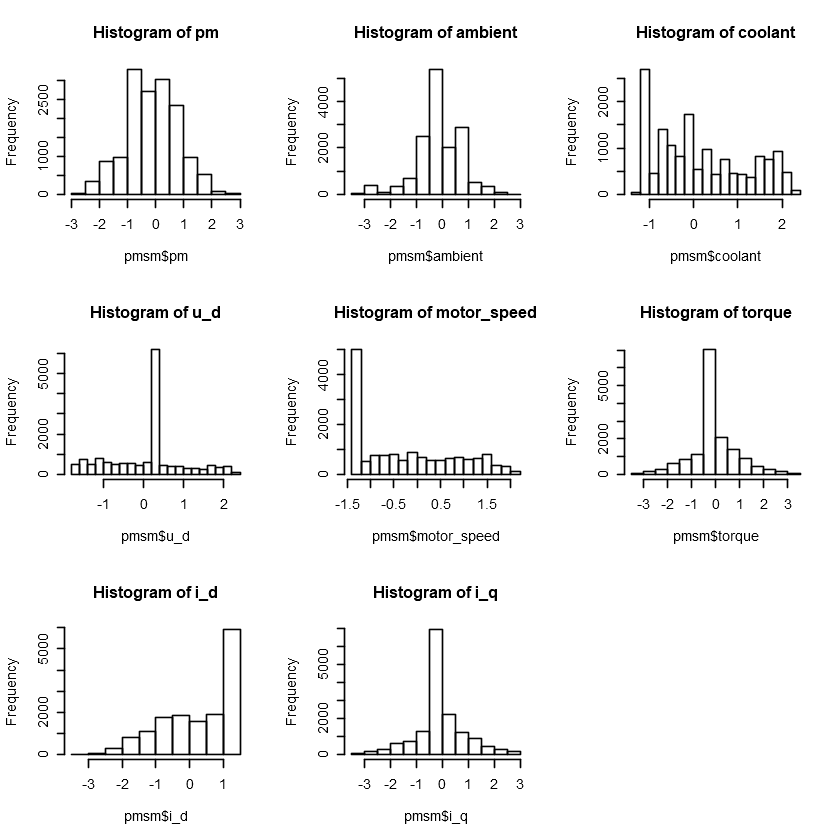

In [6]:
# Plot a histogram or bar chart of each variable
par(mfrow=c(3,3))
hist(pmsm$pm, main="Histogram of pm")
hist(pmsm$ambient, main="Histogram of ambient")
hist(pmsm$coolant, main="Histogram of coolant")
hist(pmsm$u_d, main="Histogram of u_d")
hist(pmsm$motor_speed, main="Histogram of motor_speed")
hist(pmsm$torque, main="Histogram of torque")
hist(pmsm$i_d, main="Histogram of i_d")
hist(pmsm$i_q, main="Histogram of i_q")


__<span style="color:blue"> Finding from the boxplot and histogram:</span>__

According to the boxplot and histogram:

- <font color='orange'>pm</font>, <font color='orange'>ambient</font>, <font color='orange'>torque</font>, and <font color='orange'>i_q</font> is distributed normally, with the mean around zero, and the data on the left side of the average is likely to occur as on the right side of the average. 
- <font color='orange'>coolant</font> has a random distribution where it has several peaks and it does not has as apparent pattern.
- <font color='orange'>u_d</font> and <font color='orange'>motor_speed</font> have quite uniform distribution, indicating the data is quite consistent. The frequency of each value of u_d and motor_speed is very similar to that of the others. However, there are exceptional value of u_d and motor_speed that have high frequency of occurrance. For u_d, value around 0 to 0.2 has very high frequency of occurrance. For motor_speed, value around -1.5 has very high frequenct of occurrance. As shown in the boxplot, these values are able to shift the mean of the distribution of the variable.
- The histogram of <font color='orange'>i_d</font> shows a skewed distribution to the left. It can alos be said that the distribution is negatively skewed. The upper value fo i_d has high numebr of occurrence and very few in the lower value of i_d. 

### iii) Investigate Pairs of Variables

Identify the key factors that have strong affact on the rotor temperature (property that contributes the most to the model's performance based on correlation analysis, regression equation etc.

In [7]:
# The data is reduced for lesser computation time
set.seed(101) # Set Seed so that same sample can be reproduced in future also
# Now Selecting 75% of data as sample from total 'n' rows of the data (for less computation time)
sample <- sample.int(n = nrow(pmsm), size = floor(.75*nrow(pmsm)), replace = F)

t1 <- pmsm[sample, ]
t2  <- pmsm[-sample, ]

drop <- c("stator_yoke","stator_tooth", "stator_winding", "profile_id")
t2 <- t2[ , !(names(t2) %in% drop)]

#### Scatterplot Matrix and Levelplot

Plot the predictors and target variables using levelplot and scatterplot matrix to visualise the relationships between the variables.

1) levelplot

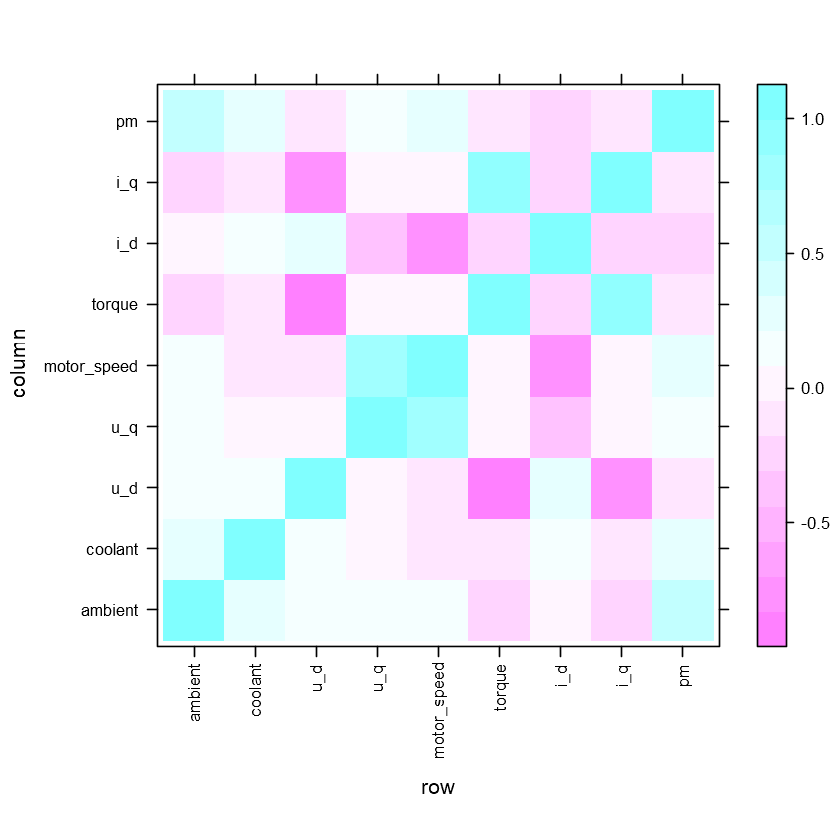

In [8]:
library(lattice)
levelplot(cor(t2), scales = list(x = list(rot = 90)))

__<span style="color:blue">Findings from the levelplot:</span>__

Note that positive correlation is towards blue, and negative correlation is towards purple. 

**Relationship between the predictor variables and the target variable**

* <font color='orange'>ambient</font>, <font color='orange'>coolant</font>, and <font color='orange'>motor_speed</font> are positively correlated with the <font color='orange'>pm</font>
* <font color='orange'>i_d</font>, <font color='orange'>torque</font>, <font color='orange'>u_d</font>, and <font color='orange'>i_q</font> are negatively correlated with the <font color='orange'>pm</font>
* <font color='orange'>u_q</font> have weak linear positive correlation with the <font color='orange'>pm</font>

2) Correlation matrix

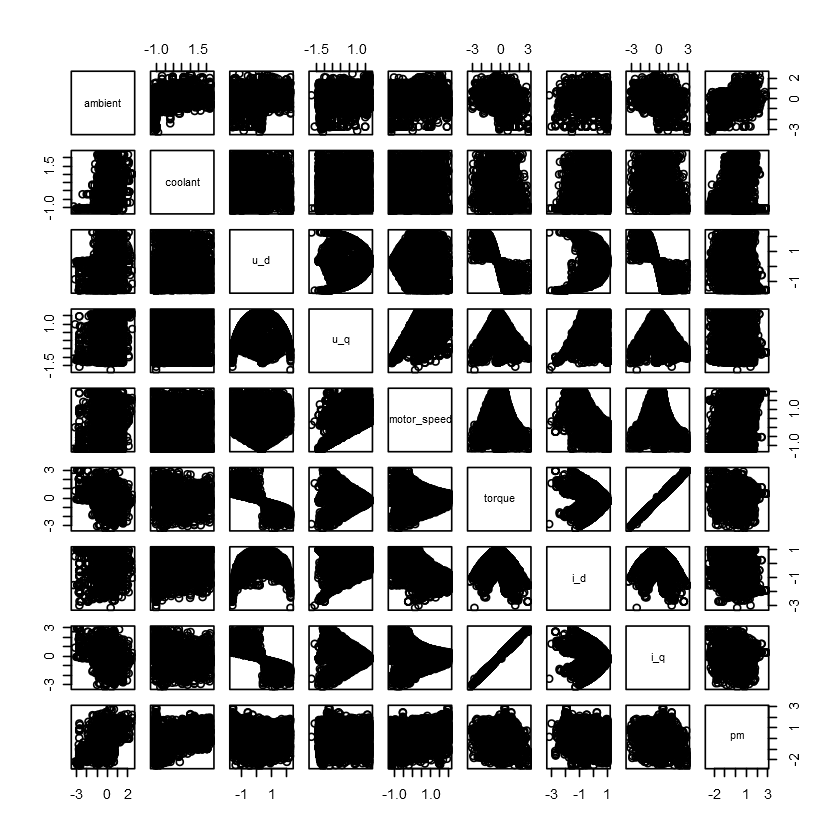

In [9]:
pairs(t2)

3) A closer look at the correlations between some of the predictor variables (i.e., u_d, u_q, motor_speed, torque, i_d and i_q).

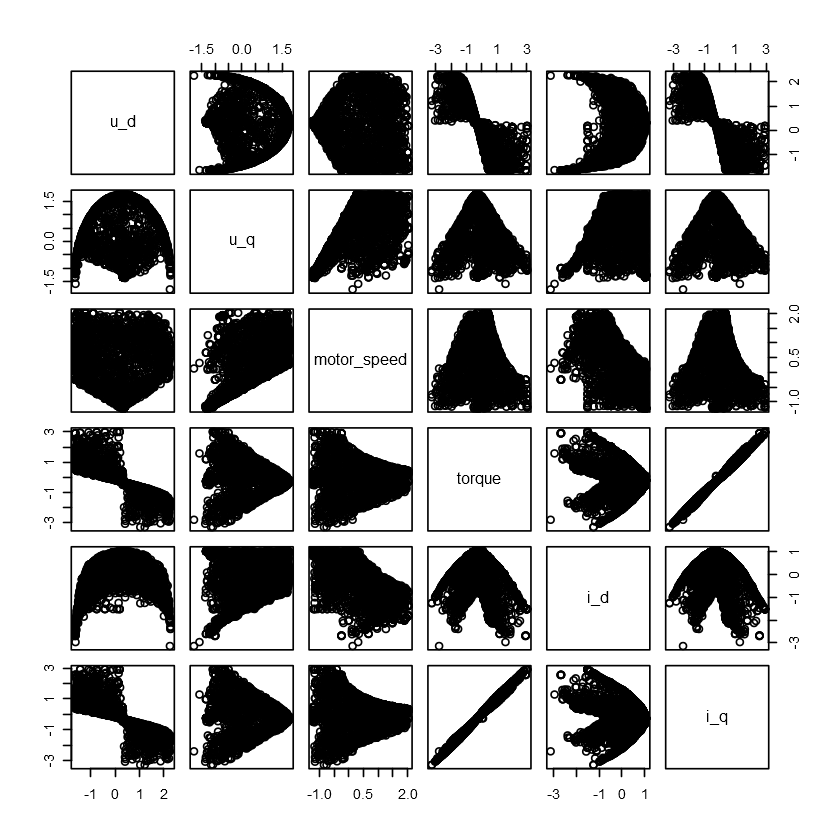

In [10]:
plot(~u_d+u_q+motor_speed+torque+i_d+i_q,data=t2)

#### Correlation Coefficient Matrix

Show the correlation coefficients for all pairs of variables

In [11]:
cor(t2)

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm
ambient,1.000000000,0.28565074,0.16835476,0.102785613,0.08783215,-0.24555622,0.002029858,-0.242538054,0.48602608
coolant,0.285650738,1.00000000,0.16522476,-0.037088885,-0.07377314,-0.16142387,0.144654176,-0.156265228,0.32009188
u_d,0.168354760,0.16522476,1.00000000,-0.032840415,-0.17534694,-0.83058808,0.302720180,-0.806842432,-0.05884025
u_q,0.102785613,-0.03708889,-0.03284042,1.000000000,0.79602720,-0.01336203,-0.363407826,-0.006684019,0.12648185
motor_speed,0.087832146,-0.07377314,-0.17534694,0.796027201,1.00000000,0.02584951,-0.772685168,0.012041727,0.29980746
torque,-0.245556217,-0.16142387,-0.83058808,-0.013362031,0.02584951,1.00000000,-0.222124274,0.996900335,-0.07787782
i_d,0.002029858,0.14465418,0.30272018,-0.363407826,-0.77268517,-0.22212427,1.000000000,-0.194994487,-0.27009149
i_q,-0.242538054,-0.15626523,-0.80684243,-0.006684019,0.01204173,0.99690034,-0.194994487,1.000000000,-0.08739845
pm,0.486026082,0.32009188,-0.05884025,0.126481849,0.29980746,-0.07787782,-0.270091488,-0.087398454,1.00000000


__<span style="color:blue">Findings from the pair-wise scatter plots and matrix of correlation coefficient:</span>__


The pair-wise relationship between the variables can be read from the scatterplots generated. The correlation between each pair of the variables can be quantified with the correlation matrix, in which:

* a positive value indicates two variables are positively correlated
* a negative value indicates two variables are negatively correlated.
* The bigger the absolute the value, the stronger the positive or negative correlation.
* 1 indicates a perfect linear positive correlation.
* The correlation coefficient in the correlation matrix does not indicate that a curvilinear relationship is present, it will only indicate that there is no linear relationship. A scatterplot is needed to indicate that a curvilinear relationship is present.
* a curvilinear relationship is present whenever one variable increases, so does the other variable, but only up to a certain point, after which, as one variable continues to increase, the other decreases. 
* Zero correlation coefficient either indicates there is no correlation between two variables or the two variables have a strong curvilinear relationship.


**Highlight Relationship between the predictor variables**

According to the pair-wise scatter plot and the correlation matrix:- 

* a **very strong linear positive correlation** between  <font color='orange'>torque</font> and  <font color='orange'>i_q</font>
* a **very strong linear negetive correlation** between  <font color='orange'>torque</font> and  <font color='orange'>u_d</font>
* a **very strong linear negetive correlation** between  <font color='orange'>u_d</font> and  <font color='orange'>i_q</font>
* a **strong linear positive correlation** between  <font color='orange'>u_q</font> and  <font color='orange'>motor_speed</font>
* a **strong linear negative correlation** between  <font color='orange'>i_d</font> and  <font color='orange'>motor_speed</font>
* a **strong curvilinear** relationship between the <font color='orange'>u_d</font> and <font color='orange'>u_q</font>
* a **curvilinear relationship** between the <font color='orange'>u_d</font> and <font color='orange'>i_d</font>
* a **curvilinear** relationship between the <font color='orange'>u_d</font> and <font color='orange'>motor_speed</font>
* a **strong curvilinear** relationship between the <font color='orange'>torque</font> and <font color='orange'>u_q</font>
* a **strong curvilinear** relationship between the <font color='orange'>i_q</font> and <font color='orange'>u_q</font>
* a **strong curvilinear** relationship between the <font color='orange'>motor_speed</font> and <font color='orange'>torque</font>
* a **strong curvilinear** relationship between the <font color='orange'>motor_speed</font> and <font color='orange'>i_q</font>
* a **curvilinear relationship** between the <font color='orange'>i_d</font> and <font color='orange'>i_q</font>




#### Analysis of Pairs of Variables

The rotor temperature, <font color='orange'>pm</font> is determined by the eight feature attributes (e.g., <font color='orange'>ambient</font>, <font color='orange'>u_d</font>, <font color='orange'>u_q</font>, <font color='orange'>i_d</font>, <font color='orange'>i_q</font>, <font color='orange'>torque</font>, <font color='orange'>motor_speed</font>, and <font color='orange'>coolant</font>). These variables are inter-related with higher ambient temperature, higher coolant temperature, faster motor speed, lower current q and d component (i_q and i_d), lower torque which is induced by current, and a lower voltage d-component(u_d).

As mentioned above, the effect of some of the predictor variables can vary depend on the value of another predictor variables. Some are strongly related to other variables, for example, <font color='orange'>torque</font> has strong relation with the <font color='orange'>i_q</font>, <font color='orange'>u_d</font>, and <font color='orange'>motor_speed</font>. There exist a strongly linear relationship between <font color='orange'>torque</font> and <font color='orange'>i_q</font>, in which the increase in i_q will increase the torque, and vice versa. There are also many curvilinear relationship going on in this dataset. For example, looking at <font color='orange'>u_q</font> and <font color='orange'>u_q</font>, with the increase in the <font color='orange'>u_d</font> there is an increase in the <font color='orange'>u_q</font> (positive correlation), however when the <font color='orange'>u_d</font> increase beyond a certain point, then <font color='orange'>u_q</font> starts to fall (negative correlation). Similar effect to the other variables with curvilinear relationship.

## 4. Model Development <a class="anchor" id="sec_4"></a>


### i) Data Frame Preparation

Firstly, let the test on two profile ids: profile id: 72 and 81.

In [12]:
testset <- pmsm[pmsm$profile_id %in% c("72", "81"), ]
trainset <- subset(pmsm, !(profile_id %in% c("72", "81")))

# train data
drops <- c("stator_yoke","stator_tooth", "stator_winding","profile_id")
train <- trainset[ , !(names(trainset) %in% drops)]
train.data <- model.matrix(pm~., train)[,-1] #without pm
train.label <- trainset[ , 'pm']

# test data
test <- testset[ , !(names(testset) %in% drops)]
test.data <- model.matrix(pm~., test)[,-1] #without pm
test.label <- testset[ , 'pm']

### ii) Model Accuracy Statistics Calculation
Statistical assessments such as Adjusted R-squared and P-values can be used in the model specification process. These algorithms helps in model selection and helps to determine which predictor variables to include in the regression model. 

#### Calculation of R-Square

A rsquare function is created to compute the r-square value of the model with the input parameters:

- predicted - a vector of predictions
- target - a vector containing the actual target values

Description:

Calculate the TSS and RSS as:
- TSS: $\sum_{i=1}^n (y_i - \bar y)^2$
- RSS: $\sum_{i=1}^n (\hat y_i - y_i)^2$

Calculate the R-Squared value according to the following formulae:
- R-Squared value: $R^2 = 1 - \frac{RSS}{TSS}$

#### Calculation of the RMSE

A RMSE functino is created to calculate the RMSE for the model with the input parameters:

- predicted - a vector of predictions
- actual - a vector containing the actual target values

Description:

Calculate the RMSE value: $RMSE = \sqrt {\sum_{i=1}^n (\hat y_i - y_i)^2 / N}$     (Lan,D.,2021)

In [13]:
# prep data for accuracy measures
train.data1 <-train[,-9]
test.data1 <- test[,-9]

# r2 function
rsquare <- function(predicted, target) {
    rss <- 0
    tss <- 0
    target.mean <- mean(target)
    for (i in 1:length(predicted)) {
        rss <- (predicted[i]-target[i])^2
        tss <- (target[i]-target.mean)^2
    }
    rsquared <- 1 - rss/tss
    return(rsquared)
}

# rmse function
rmse = function(actual, predicted) {
  sqrt(mean((actual - predicted) ^ 2))
}

### iii) Standard Linear Model (Least-Square Regression)

#### Analyse the Least-Square Regression

Try to fit all predictor variables into the model to see which attributes that have significant impact on the prediction of the rotor temperature. 

In [14]:
my_fit = lm(pm ~ ., data = train)
summary(my_fit)


Call:
lm(formula = pm ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8405 -0.4576 -0.0033  0.4600  3.2775 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.008559   0.007354   1.164  0.24446    
ambient      0.366167   0.008425  43.464  < 2e-16 ***
coolant      0.325430   0.008323  39.102  < 2e-16 ***
u_d         -0.173105   0.016134 -10.729  < 2e-16 ***
u_q         -0.348085   0.016017 -21.732  < 2e-16 ***
motor_speed  0.558009   0.023805  23.440  < 2e-16 ***
torque      -0.328479   0.117968  -2.784  0.00537 ** 
i_d          0.039080   0.016901   2.312  0.02078 *  
i_q          0.243389   0.110906   2.195  0.02822 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7223 on 9643 degrees of freedom
Multiple R-squared:  0.4919,	Adjusted R-squared:  0.4914 
F-statistic:  1167 on 8 and 9643 DF,  p-value: < 2.2e-16


__<span style="color:blue">Explanation:</span>__

The adjusted R-squared ($R^2$) value indicates this model explains 49.14% of the variation in the rotor temperature. 

The F-statistic 1167 has a p-value < 2.2e-16 - so reject the null hypothesis (the model explains nothing) - the model is useful.

The variables coefficients suggest that for every unit increase in ambient, coolant, motor_speed, i_d or i_q, there will be an increase in the mean value of rotor temperature by 0.366, 0.325, 0.558, 0.039, 0.243, respectively, provided that other predictors are held constant when one is increasing. Also, for every increase in the u_d, u_q, or torque, the mean value of the rotor temperature will decrease by 0.173, 0.348, and 0.328 respectively, given that other predictors are held constant. 

##### Hypothesis Testing

Hypothesis testing with the null and alternative hypothesis as below:

        a. H0: The attribute (i.e. ambient, coolant, u_d, u_q, motor_speed, torque, i_d, and i_q) has no role to play in the changes to rotor temperature.
        b. H1: The attribute has a role to play in the changes to rotor temperature

By looking at the p-values in the summary Pr(>|t|), the predictors <font color='orange'>ambient</font>,  <font color='orange'>coolant</font>, <font color='orange'>u_d</font>, <font color='orange'>u_q</font>, <font color='orange'>motor_speed</font>, <font color='orange'>torque</font>, <font color='orange'>i_d</font>, and <font color='orange'>i_q</font> have low p-value which is less than 0.05, thus the null hypothesis can be rejected. This means that all the predictors are possibly associated with <font color='orange'>pm</font>. <font color='orange'>ambient</font>,  <font color='orange'>u_q</font>, and <font color='orange'>motor_speed</font> appear to be the three strongest predictors of rotor temperature as the absolute value of regression coefficient of these variables are largest among the variables.

#### Diagnostic Plots

Use the `plot()` function to produce diagnostic plots to check the residuals. The linear model is diagnose with four plots to check for the following assumptions:

* <font color="red">Constant variance</font>
* <font color="red">linearity</font> 
* <font color="red">Normality</font>


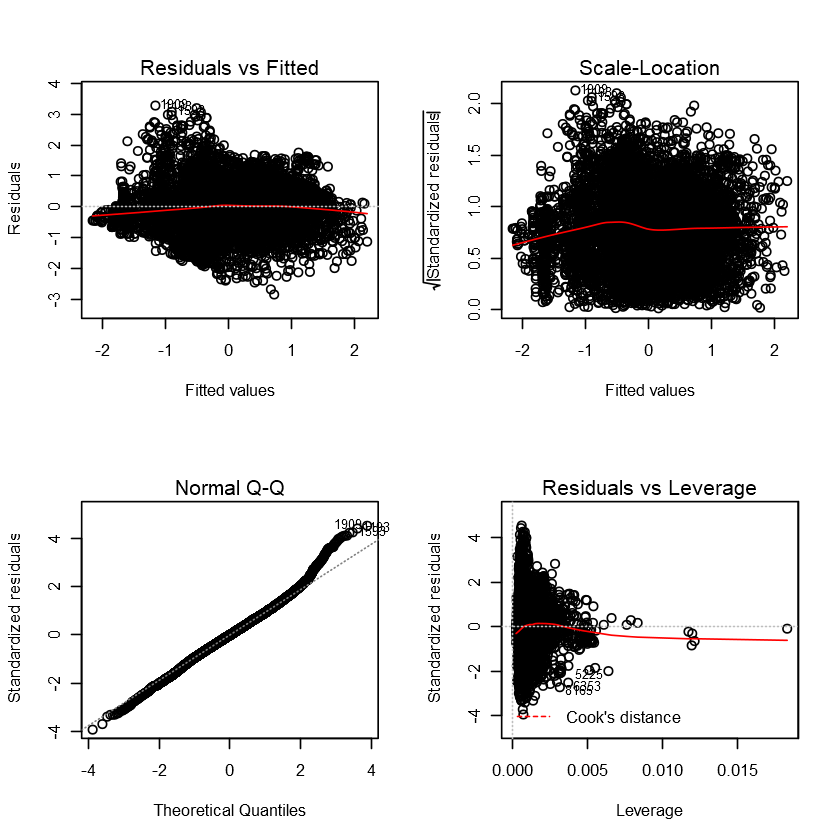

In [15]:
par(mfcol=c(2,2))
plot(my_fit)

The diagnostic plots show residuals in four different ways.

1. The **residual vs fitted plot**: The plot above shows that there could be a linear relationship between <font color='orange'>pm </font>and all the predictors, as the residuals are scattered evenly around a horizontal line without distinct patterns.

* The normal **Q-Q plot**: The residuals are distributed normally with constant variance and mean equal to zero as the residuals are lined almost in a straight line. 

* The **scale-location plot**: The plot shows a horizontal line with equally (randomly) spread points, this indicates that the residuals appeared to be randomly spread along the ranges of predictors.

* The **residual-leverage plot**: The Cook’s distance lines can barely be seen in the plot as all cases are well inside of the Cook’s distance lines. Therefore no influential cases are observed.

In conclusion, the model complies with the assumptions.

### Feature Selection for the least square regression

Feature selection method such as stepwise regression and best subsets regression are able to help in identifying the useful set of predictor variables in the early model spedification process automatically.

#### Stepwise Selection
The stepwise regression is applied with the  𝐁𝐈𝐂  penalty to prune out potentially less significant variables. This method helps to chose the simpler model from the models with similar prediction power. 

As the sample size of the training data used in this assessment is larger than the number of predictor variables, **Backward stepwise selection** is more suitable. Backward selection takes into account for the effects of all predictor variables because it starts with a full model. Keeping all variables in the model allows the collinearity between the variables to be considered in the selection process. https://www.tandfonline.com/doi/abs/10.1080/00401706.1970.10488701?journalCode=utch20&

* Backward stepwise selection

In [16]:
# Stepwise regression model
step.model <- stepAIC(my_fit, direction = "backward", 
                      trace = FALSE)
summary(step.model)


Call:
lm(formula = pm ~ ambient + coolant + u_d + u_q + motor_speed + 
    torque + i_d + i_q, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8405 -0.4576 -0.0033  0.4600  3.2775 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.008559   0.007354   1.164  0.24446    
ambient      0.366167   0.008425  43.464  < 2e-16 ***
coolant      0.325430   0.008323  39.102  < 2e-16 ***
u_d         -0.173105   0.016134 -10.729  < 2e-16 ***
u_q         -0.348085   0.016017 -21.732  < 2e-16 ***
motor_speed  0.558009   0.023805  23.440  < 2e-16 ***
torque      -0.328479   0.117968  -2.784  0.00537 ** 
i_d          0.039080   0.016901   2.312  0.02078 *  
i_q          0.243389   0.110906   2.195  0.02822 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7223 on 9643 degrees of freedom
Multiple R-squared:  0.4919,	Adjusted R-squared:  0.4914 
F-statistic:  1167 on 8 and 9643 DF,  p-value: < 2.2e-16

__<span style="color:blue">Finding:</span>__

None of the variable has been removed, hence the complexity of the model remains unchanged after the `stepAIC` function. This means that all the predictor variables have a significant association with the response variable. 

As the training data used is not considered very large with many variables, **best subset regression** selection approach can be applied to see if a simpler and better combination of predictor variables can be found.

#### Best Subsets Regression
The best subsets regression is a model selection technique that involves testing all possible set of the predictor variables, and then select the final best model based on statistical criteira. The `regsubsets()` function is used to identify different models of different feature sizes.

In [17]:
regfit_full = regsubsets(pm~., data = train, nvmax=8) # 8 perdictor variables in the data
reg_summary <- summary(regfit_full)
reg_summary

Subset selection object
Call: regsubsets.formula(pm ~ ., data = train, nvmax = 8)
8 Variables  (and intercept)
            Forced in Forced out
ambient         FALSE      FALSE
coolant         FALSE      FALSE
u_d             FALSE      FALSE
u_q             FALSE      FALSE
motor_speed     FALSE      FALSE
torque          FALSE      FALSE
i_d             FALSE      FALSE
i_q             FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         ambient coolant u_d u_q motor_speed torque i_d i_q
1  ( 1 ) "*"     " "     " " " " " "         " "    " " " "
2  ( 1 ) "*"     " "     " " " " " "         " "    "*" " "
3  ( 1 ) "*"     "*"     " " " " " "         " "    "*" " "
4  ( 1 ) "*"     "*"     " " "*" "*"         " "    " " " "
5  ( 1 ) "*"     "*"     "*" "*" "*"         " "    " " " "
6  ( 1 ) "*"     "*"     "*" "*" "*"         "*"    " " " "
7  ( 1 ) "*"     "*"     "*" "*" "*"         "*"    "*" " "
8  ( 1 ) "*"     "*"     "*" "*" "*"         "*" 

##### Optimal Model Selection - best subset of attributes

The overall performance of the models with different feature sizes are compared with statistical metricics and plots. K-fold cross-validation will be applied in this section, and the model with the lowest prediction error will be chosen.

##### Criteria of Model Section: Adjusted R-square, Cp, and BIC

The best model and be identified with the regression model accuracy metrics such as Adjusted R2, Cp, and BIC. The best overall model is define as the model that have maximum adjusted R2 and minimum predictor error (i.e., RSS, Cp, and BIC). Plot RSS, R2, Cp, and BIC to decide which model is to be selected.  (James et al (2015, p 244-255))

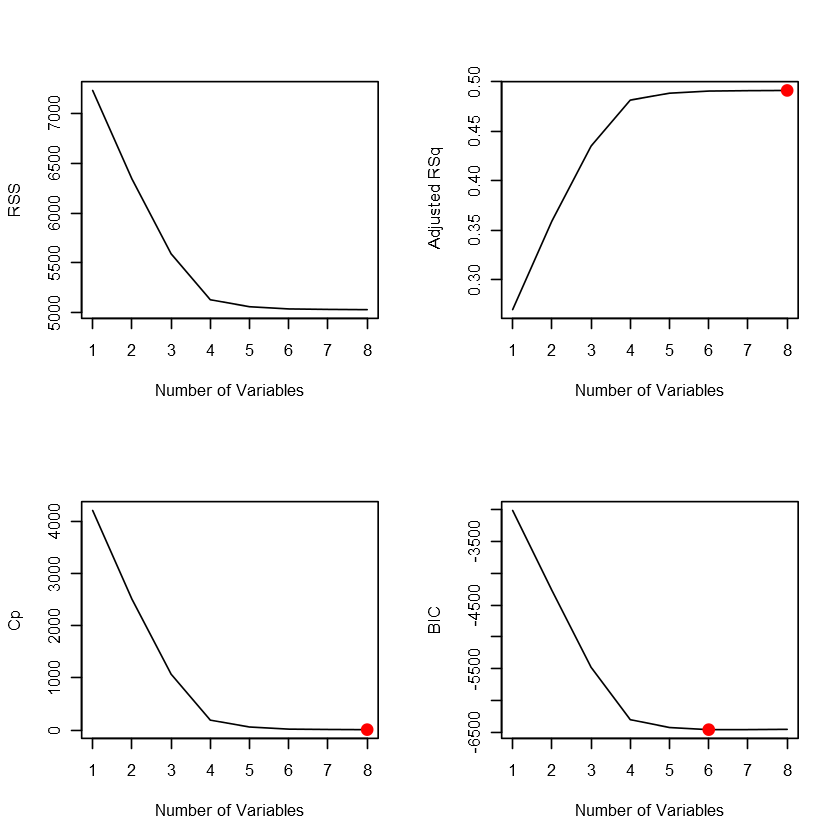

In [18]:
# Set up a 2x2 grid so we can look at 4 plots at once
par(mfrow = c(2,2))
plot(reg_summary$rss, xlab = "Number of Variables", ylab = "RSS", type = "l")
plot(reg_summary$adjr2, xlab = "Number of Variables", ylab = "Adjusted RSq", type = "l")
# We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
# The which.max() function can be used to identify the location of the maximum point of a vector
adj_r2_max = which.max(reg_summary$adjr2) # 11
# The points() command works like the plot() command, except that it puts points
# on a plot that has already been created instead of creating a new plot
points(adj_r2_max, reg_summary$adjr2[adj_r2_max], col ="red", cex = 2, pch = 20)
# We'll do the same for C_p and BIC, this time looking for the models with the SMALLEST statistic
plot(reg_summary$cp, xlab = "Number of Variables", ylab = "Cp", type = "l")
cp_min = which.min(reg_summary$cp) # 10
points(cp_min, reg_summary$cp[cp_min], col = "red", cex = 2, pch = 20)
plot(reg_summary$bic, xlab = "Number of Variables", ylab = "BIC", type = "l")
bic_min = which.min(reg_summary$bic) # 6
points(bic_min, reg_summary$bic[bic_min], col = "red", cex = 2, pch = 20)


__<span style="color:blue">Finding:</span>__

There is no single measure to select the model. According to BIC, the best performer is the model with 6 variables. However, Cp and R2 suggest that 8 is the best. All the plots above suggests that a model with less than 5 predictors is insufficient (underfitting), and the model performance will increase and come to nearly constant after 5 predictors. Depending on different matrics, there will be different "best" models. Hence, additional approach is required. 

##### K-fold Cross Validation

In order to avoid overfitting, k-fold cross-validation technique is used to select the best model based on the prediction errors. The `train()` function is used to compute the k-fold cross validation. The linear model is trained on the training data set using the k-fold cross-validation with **k=5**. The model with the minimum prediction error will be chosen as the best model. 

* `select_variable_model()` function is created to get the model returned by the best subset regression, in which the best n-variable model can be selected. (Kassambara, 2018)

In [19]:
# n: number of predictor variable
# model: regsubsets model 
# outcome: target variable

select_variable_model <- function(n, model, outcome){
  # regsubset model summary
  models <- summary(model)$which[n,-1]
  # label prediction
  predictors <- names(which(models == TRUE))
  predictors <- paste(predictors, collapse = "+")
  # generating model 
  as.formula(paste0(outcome, "~", predictors))
}

* `error_cv()` function is created to obtain the error from the cross-validation with k=5.

In [20]:
error_cv <- function(model.formula, data){
  set.seed(1)
  train.control <- trainControl(method = "cv", number = 5)
  cv <- train(model.formula, data = data, method = "lm",
              trControl = train.control)
  cv$results$RMSE
}

* Compute the prediction error on the test set using the 5-fold cross-validation for different best models generated from the best subset regression function. 

In [21]:
# Error from cross-validation
vars <- 1:8
error.cv <-  map(vars, select_variable_model, regfit_full, "pm") %>%
  map(error_cv, data = train) %>%
  unlist()
error.cv

[1] 0.8654197 0.8106638 0.7611182 0.7290235 0.7241717 0.7226535 0.7223621
[8] 0.7223193

In [22]:
# Select the model with the least cross-validation error
which.min(error.cv)
coef(regfit_full, 8)

[1] 8

(Intercept)      ambient      coolant          u_d          u_q  motor_speed 
 0.008559424  0.366166843  0.325429699 -0.173105122 -0.348085352  0.558008969 
      torque          i_d          i_q 
-0.328479097  0.039080016  0.243389015

__<span style="color:blue">Finding:</span>__

It can be seen that the model with all the variables (8 predictor variables) has the best performance with the lower prediction error.

Both of the subset selection methods (i.e., best subset selection and stepwise selection) suggest that all the predictor variables have a significant association with the response variable, and thus none of the predictor variable should be pruned off.

#### Interaction Effects between Predictor Variables

From the EDA above, it can be seen that the effect of some of the variable depends on the value of another variables. In other words, the model may create multicoliinearity. Therefore, try to fit linear regression models with interaction effects to see if there is any interactions appear to be statistically significant. Check whether or not the interaction between:

- <font color="orange">torque</font> and <font color="orange">i_q</font>
- <font color="orange">torque</font> and <font color="orange">u_d</font>
- <font color="orange">u_q</font> and <font color="orange">motor_speed</font>
- <font color="orange">i_d</font> and <font color="orange">motor_speed</font>
- <font color="orange">u_d</font> and <font color="orange">u_q</font>
- <font color="orange">u_d</font> and <font color="orange">i_d</font>
- <font color="orange">u_d</font> and <font color="orange">motor_speed</font>
- <font color="orange">torque</font> and <font color="orange">u_q</font>
- <font color="orange">torque</font> and <font color="orange">motor_speed</font>
- <font color="orange">motor_speed</font> and <font color="orange">i_q</font>
- <font color="orange">i_d</font> and <font color="orange">i_q</font>

can affect the model accuracy.

In [23]:
new_fit <- update(my_fit, . ~ . + torque:u_d + torque:i_q + u_q:motor_speed + i_d:motor_speed +  u_d:u_q + u_d:i_d + u_d:motor_speed + torque:u_q + motor_speed:torque + motor_speed:i_q + i_d:i_q)

summary(new_fit)


Call:
lm(formula = pm ~ ambient + coolant + u_d + u_q + motor_speed + 
    torque + i_d + i_q + u_d:torque + torque:i_q + u_q:motor_speed + 
    motor_speed:i_d + u_d:u_q + u_d:i_d + u_d:motor_speed + u_q:torque + 
    motor_speed:torque + motor_speed:i_q + i_d:i_q, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.4801  -0.3924   0.0012   0.3924   3.0069 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         1.084093   0.047740  22.708  < 2e-16 ***
ambient             0.338286   0.007690  43.990  < 2e-16 ***
coolant             0.276661   0.007817  35.390  < 2e-16 ***
u_d                -5.528607   0.263568 -20.976  < 2e-16 ***
u_q                -3.057083   0.088070 -34.712  < 2e-16 ***
motor_speed         2.696312   0.142410  18.934  < 2e-16 ***
torque             -6.535570   0.340393 -19.200  < 2e-16 ***
i_d                 1.971818   0.063983  30.818  < 2e-16 ***
i_q                 0.828384   0.417519   1.984   

__<span style="color:blue">Explanation:</span>__

The increased Adjusted R-squared (as compared to the full model) indicates that the new interaction terms have improve the model more than would be expected by chance. Specifically, the model with the interaction term explains more variation of the data than the one without interaction. However, the residuals for the new model with interaction terms are still require to be checked.

##### Check the residuals for the new model with interaction terms

The linear model is diagnose with four plots to check for the following assumptions:

* <font color="red">Constant variance</font>
* <font color="red">linearity</font> 
* <font color="red">Normality</font>

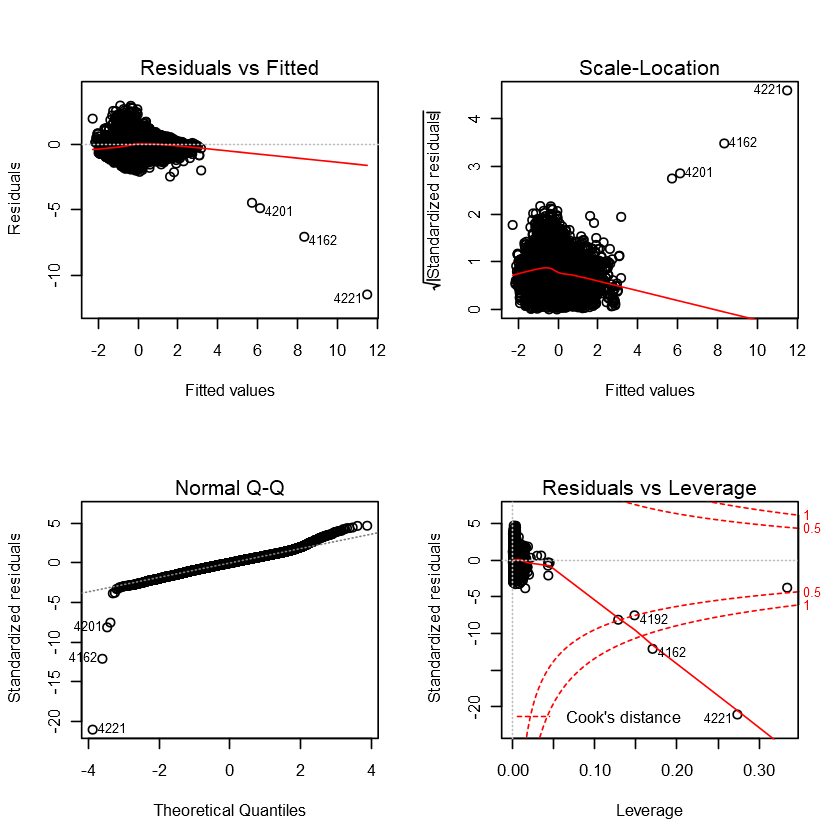

In [24]:
par(mfcol=c(2,2))
plot(new_fit)

The new model plots show:
- Residual vs Fitted - The plot shows the residuals reasonably evenly distributed around zero, but they several points which the fitted value is large, are out of the zero line. This means that these points could effect the model to hava a linear relationship between pm and all the predictors. 
- Normal Q-Q - The plot indicate that the residuals are normally distributed, except for some outliers that are not fitted in the distribution.
- Scale-Location - The chart shows the model violates the assumption of equal variance due to some extreme outliers. 
- Residuals vs Leverage - In this plot we see that there are several possibly influential outliers. The points that lie close to or outside of the dashed red curves are worth investigating further.

##### Handling Outliers

Not all outliers are influential in the regression model. It is vital to identify which data are influential in determining the regression line, because influential data are able to alter the results of the analysis. It can be seen that in the residual-leverage plot above, the outlying values are at the lower right side. As those points exceeded the Cook's distance, they will be influential against the regression results. 

Following ways are carried out to examine the outlier data: 

1. Run `OutlierTest()` which will test whether the largest absolute studentized residual values from the model is statiscally different from the other observations.

2. Use residual plots (i.e., Cook's distance and influences plot) to identify outliers or high leverage observations in the model.

3. Plot `dfbetaPlots()` to identify which data points exert the most influence on the regression coefficients of the regression model.

In [25]:
# outlier test
outlierTest(new_fit, cutoff=0.05, digits = 1)

       rstudent unadjusted p-value Bonferroni p
4221 -21.569570        8.2179e-101   7.9319e-97
4162 -12.205303         5.1901e-34   5.0095e-30
4201  -8.168818         3.5060e-16   3.3840e-12
4192  -7.560182         4.3927e-14   4.2398e-10
1909   4.711478         2.4937e-06   2.4069e-02
1471   4.687766         2.8000e-06   2.7025e-02

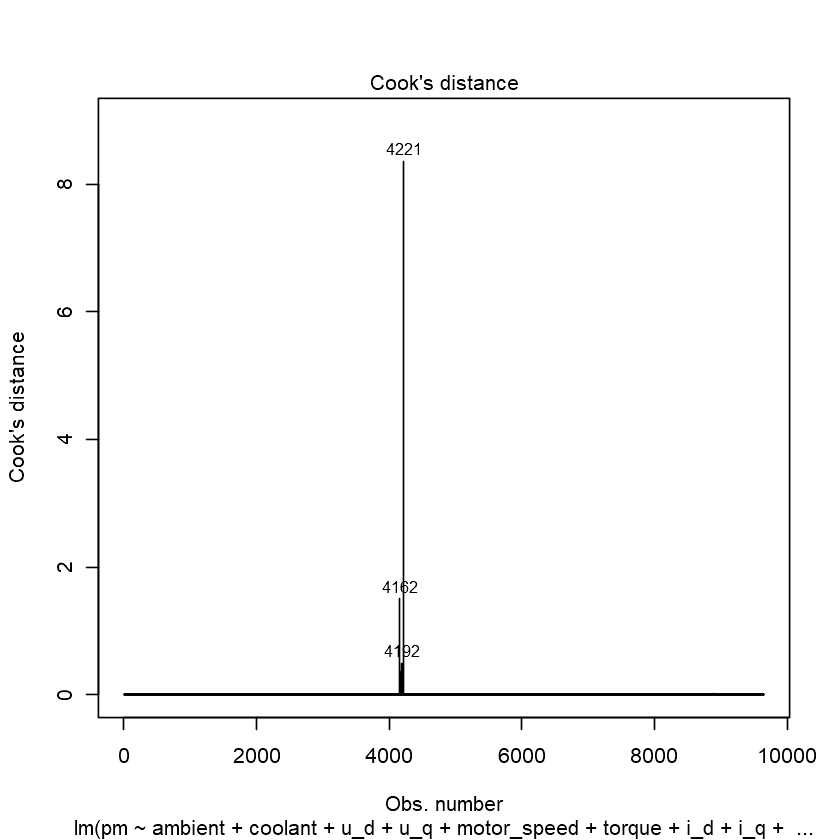

In [26]:
# cook's distance plot
plot(new_fit, which = 4)

Warning message in plot.window(...):
""id.method" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""id.method" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""id.method" is not a graphical parameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""id.method" is not a graphical parameter"Warning message in box(...):
""id.method" is not a graphical parameter"Warning message in title(...):
""id.method" is not a graphical parameter"Warning message in plot.xy(xy.coords(x, y), type = type, ...):
""id.method" is not a graphical parameter"

,StudRes,Hat,CookD
4162,-12.205303,0.1703632,1.5063774
4172,-3.774454,0.3341900,0.3570463
4221,-21.569570,0.2735834,8.3582144


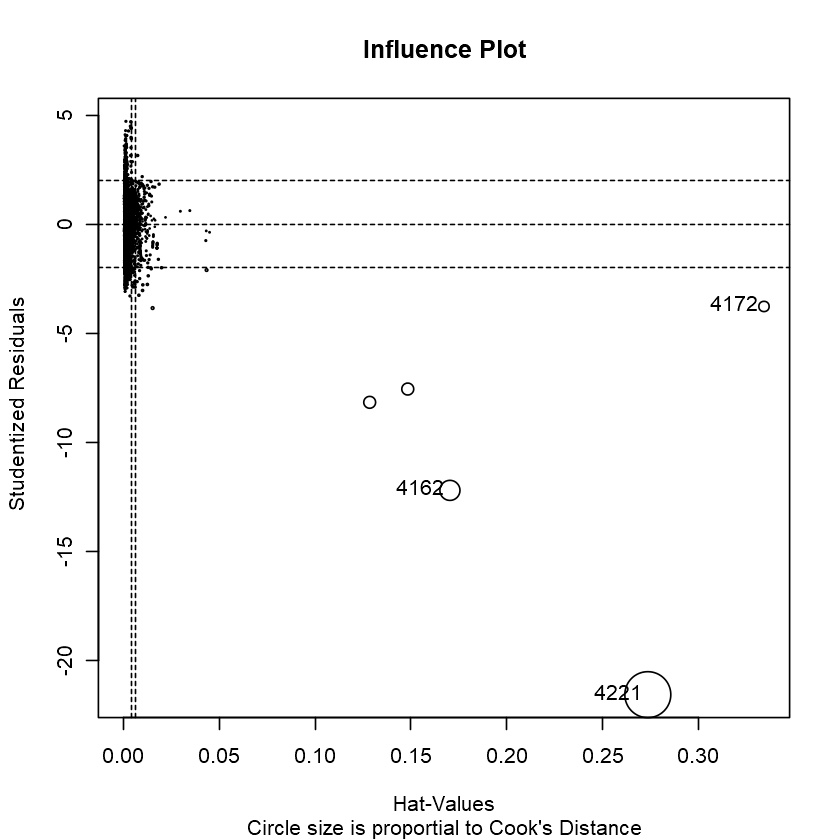

In [27]:
# influential plot
influencePlot(new_fit, scale=5, id.method="noteworthy", main="Influence Plot", sub="Circle size is proportial to Cook's Distance" )

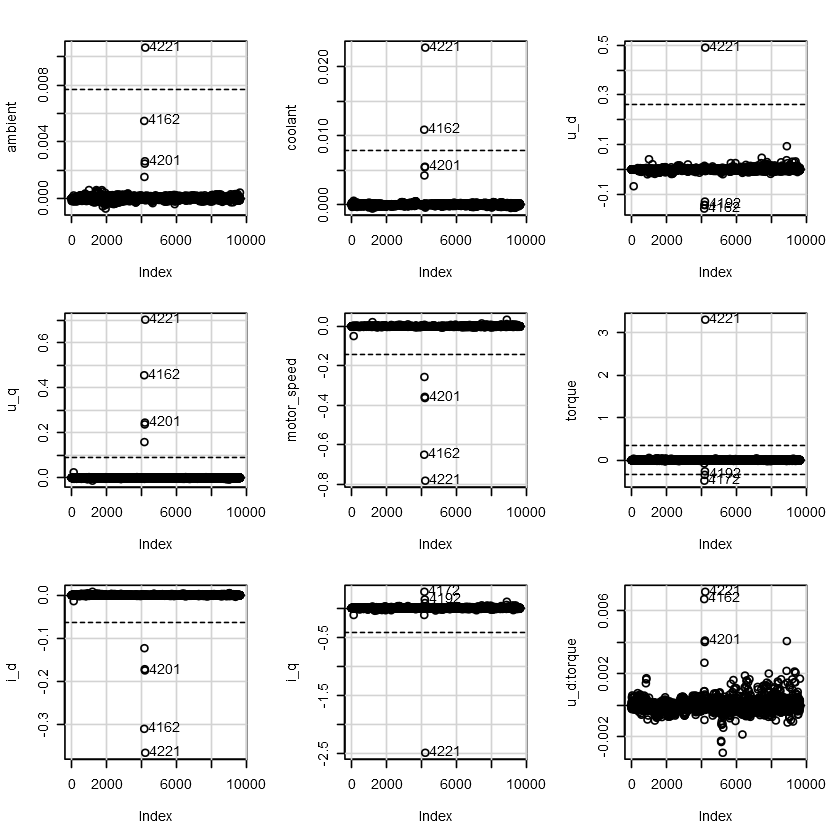

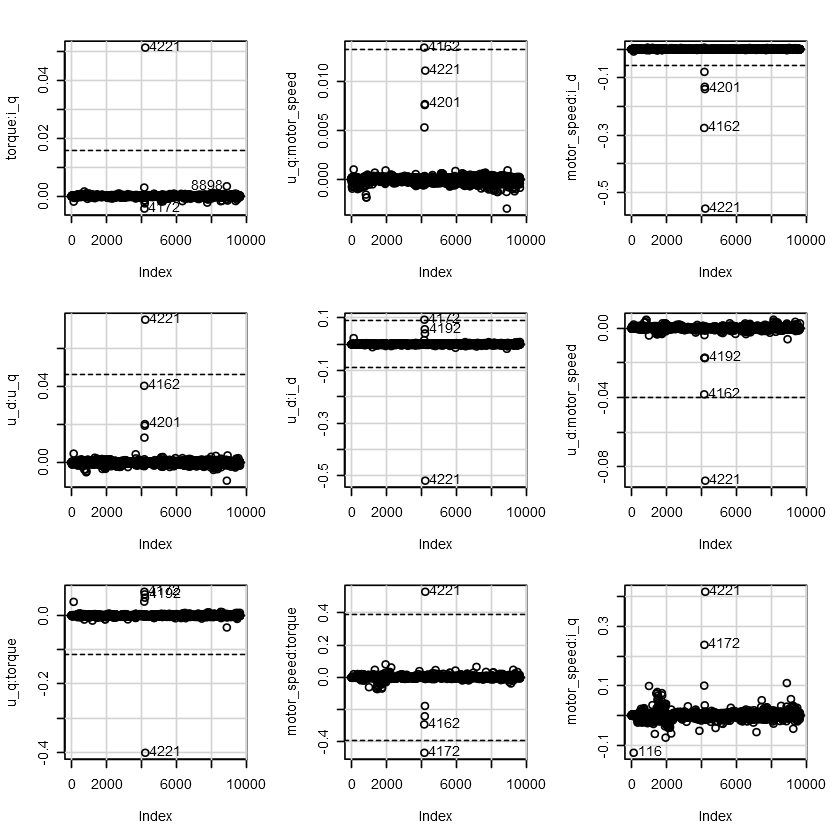

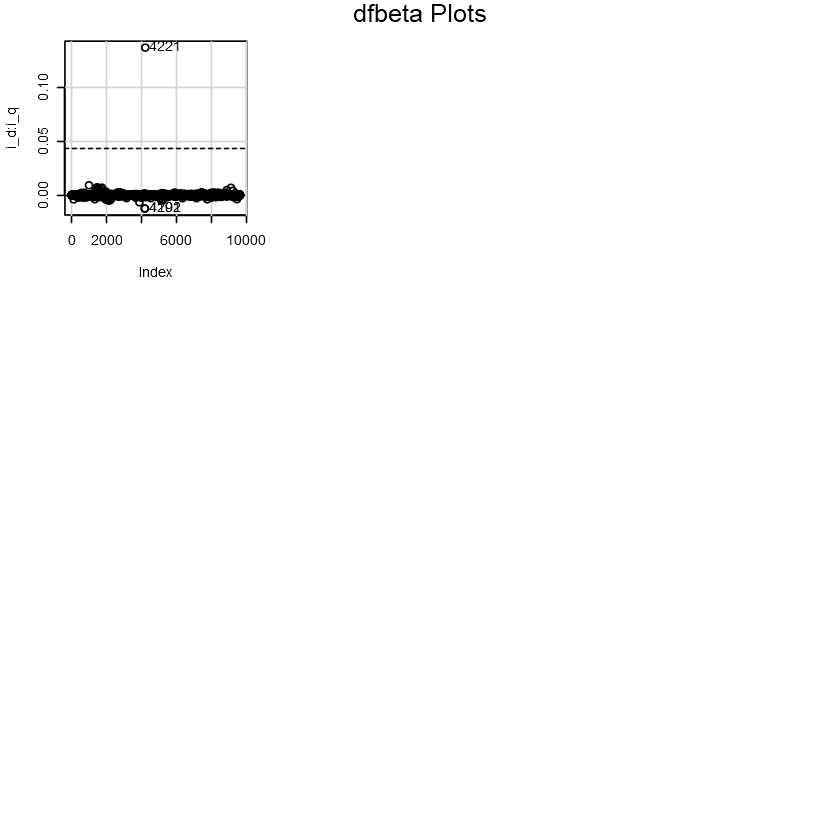

In [28]:
# dfbeta plot
plotdb<-dfbetaPlots(new_fit, id.n=3)

__<span style="color:blue">Findings:</span>__


**Observation from the Cook's distance plot:** The plots above show point 4222, 4162, and 4192 are located far from the majority of the points.

**Observation from the Influence plot:** Point 4162, 4172, and 4221 are the influence observations in the regression model.

**Observation from the Outlier test:** The outlier test shows that data point 1909 and 1471 are not outliers, whereas point 4221, 4162, 4201, and 4192 are outliers.

**Observation from the dfbeta plot:** The plots shows that point 4221, 4162, 4192, and 4201 are points that have considerable influence on the regression model.

In conclusion, point **4221**, **4162**, **4201**, **4172**, **4192**, and **116** will be removed to develop the linear regression model as these observation are sensitive to the linear regression model and will alter the results of the model analysis.

In [29]:
# outlier to be removed from the training dataset
myData <- train[-c(4221, 4162, 4201, 4172, 4192, 116), ]

##### Comparing original model and model with interaction terms after removal of outliers

1. Original full model with outlier removed.

In [30]:
#lm without interaction term
tic("linear model fitting") # compute the computation time
my_fit = lm(pm ~ ., data = myData)
toc()
summary(my_fit)

linear model fitting: 0.02 sec elapsed



Call:
lm(formula = pm ~ ., data = myData)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8404 -0.4576 -0.0033  0.4598  3.2766 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.008640   0.007358   1.174  0.24031    
ambient      0.366207   0.008428  43.453  < 2e-16 ***
coolant      0.325361   0.008328  39.066  < 2e-16 ***
u_d         -0.173586   0.016248 -10.683  < 2e-16 ***
u_q         -0.348746   0.016126 -21.627  < 2e-16 ***
motor_speed  0.558660   0.024016  23.262  < 2e-16 ***
torque      -0.338065   0.119995  -2.817  0.00485 ** 
i_d          0.039257   0.017079   2.299  0.02155 *  
i_q          0.252583   0.112710   2.241  0.02505 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7224 on 9637 degrees of freedom
Multiple R-squared:  0.4916,	Adjusted R-squared:  0.4912 
F-statistic:  1165 on 8 and 9637 DF,  p-value: < 2.2e-16


* Check for training and testing errors on original model without the interaction term.

In [31]:
# lm without interaction term
# RMSE and R2 on the training data
pred1.train <- predict(my_fit, newdata = train.data1)
rmse.lm1.train <- rmse(predicted = pred1.train, actual = train.label)
r2.lm1.train <- rsquare(pred1.train, train.label)
print(paste("RMSE(on trainset) for the least-square regression model without interaction term is", rmse.lm1.train))
print(paste("R2(on trainset) for the least-square regression model without interaction term is", r2.lm1.train))


# RMSE and R2 on the testing data
pred1 <- predict(my_fit, newdata = test.data1)
rmse.lm1 <- rmse(predicted = pred1, actual = test.label)
r2.lm1 <- rsquare(pred1, test.label)
print(paste("RMSE(on testset) for the least-square regression model without interaction term is", rmse.lm1))
print(paste("R2(on testset) for the least-square regression model without interaction term is", r2.lm1))

[1] "RMSE(on trainset) for the least-square regression model without interaction term is 0.721916896693964"
[1] "R2(on trainset) for the least-square regression model without interaction term is 0.799022573629093"
[1] "RMSE(on testset) for the least-square regression model without interaction term is 0.709623098230743"
[1] "R2(on testset) for the least-square regression model without interaction term is 0.461733252168262"


2. The interaction terms mentioned above are added into the full model (outliers removed).

In [32]:
tic("linear model fitting with interaction terms")
new_fit2 <- update(my_fit, . ~ . + torque:u_d + torque:i_q + u_q:motor_speed + i_d:motor_speed +  u_d:u_q + u_d:i_d + u_d:motor_speed + torque:u_q + motor_speed:torque + motor_speed:i_q + i_d:i_q)
toc()
summary(new_fit2)


linear model fitting with interaction terms: 0.11 sec elapsed



Call:
lm(formula = pm ~ ambient + coolant + u_d + u_q + motor_speed + 
    torque + i_d + i_q + u_d:torque + torque:i_q + u_q:motor_speed + 
    motor_speed:i_d + u_d:u_q + u_d:i_d + u_d:motor_speed + u_q:torque + 
    motor_speed:torque + motor_speed:i_q + i_d:i_q, data = myData)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2295 -0.3565 -0.0077  0.3453  3.3630 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         3.497589   0.074462  46.971  < 2e-16 ***
ambient             0.278452   0.007172  38.823  < 2e-16 ***
coolant             0.143120   0.007844  18.247  < 2e-16 ***
u_d                -3.559335   0.253979 -14.014  < 2e-16 ***
u_q                -8.245778   0.151141 -54.557  < 2e-16 ***
motor_speed        10.175695   0.230290  44.186  < 2e-16 ***
torque             -5.481624   0.381158 -14.382  < 2e-16 ***
i_d                 5.519018   0.107449  51.364  < 2e-16 ***
i_q                 2.230471   0.407616   5.472 4.56e-08 **

__<span style="color:blue">Findings:</span>__

Some interactions are not significant:

By looking at the p-values in the summary Pr(>|t|), the predictors u_d:u_q, motor_speed:i_q, and i_d:i_q have high p-value which is very much more than 0.05, thus the null hypothesis that these attributes have no role to play in the changes to rotor temperature cannot be rejected. Hence, these interaction terms can be removed from the model.

The computation time to fit the linear model is almost instant.

* Check for trainng and testing errors on model with interaction term

In [33]:
# RMSE and R2 on the training data
pred3.train <- predict(new_fit2, newdata = train.data1)
rmse.lm3.train <- rmse(predicted = pred3.train, actual = train.label)
r2.lm3.train <- rsquare(pred3.train, train.label)
print(paste("RMSE(on trainset) for the least-square regression model with interaction term is", rmse.lm3.train))
print(paste("R2(on trainset) for the least-square regression model with interaction term is", r2.lm3.train))

# RMSE and R2 on the testing data
pred3 <- predict(new_fit2, newdata = test.data1)
rmse.lm3 <- rmse(predicted = pred3, actual = test.label)
r2.lm3 <- rsquare(pred3, test.label)
print(paste("RMSE(on testset) for the least-square regression model with interaction term is", rmse.lm3))
print(paste("R2(on testset) for the least-square regression model with interaction term is", r2.lm3))

[1] "RMSE(on trainset) for the least-square regression model with interaction term is 0.758322728155773"
[1] "R2(on trainset) for the least-square regression model with interaction term is 0.0630492865032913"
[1] "RMSE(on testset) for the least-square regression model with interaction term is 0.598144277478062"
[1] "R2(on testset) for the least-square regression model with interaction term is 0.677774715219061"


3. The interaction terms mentioned above (except for u_d:u_q, motor_speed:i_q, and i_d:i_q) are added into the full model (outliers removed).

In [34]:
#lm with interaction term
tic("linear fitting with interaction term")
new_fit3 <- update(my_fit, . ~ . + torque:u_d + torque:i_q + u_q:motor_speed + i_d:motor_speed + u_d:i_d + u_d:motor_speed + torque:u_q + motor_speed:torque)
toc()
summary(new_fit3)

linear fitting with interaction term: 0.01 sec elapsed



Call:
lm(formula = pm ~ ambient + coolant + u_d + u_q + motor_speed + 
    torque + i_d + i_q + u_d:torque + torque:i_q + u_q:motor_speed + 
    motor_speed:i_d + u_d:i_d + u_d:motor_speed + u_q:torque + 
    motor_speed:torque, data = myData)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2566 -0.3557 -0.0068  0.3435  3.3831 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         3.516214   0.072105  48.765  < 2e-16 ***
ambient             0.278196   0.007161  38.847  < 2e-16 ***
coolant             0.141755   0.007647  18.536  < 2e-16 ***
u_d                -3.471787   0.203242 -17.082  < 2e-16 ***
u_q                -8.290968   0.143027 -57.968  < 2e-16 ***
motor_speed        10.261909   0.210592  48.729  < 2e-16 ***
torque             -5.689857   0.308471 -18.445  < 2e-16 ***
i_d                 5.542701   0.101344  54.692  < 2e-16 ***
i_q                 2.523239   0.230967  10.925  < 2e-16 ***
u_d:torque         -0.339469   0.014

__<span style="color:blue">Findings:</span>__

The similar Adjusted R-squared indicates that the removed interaction terms have do not cause much effect on the model performance. In other words, excluding the three variables makes the model simple but without significantly losing the modeling accuracy. The computation time to fit the linear model is almost instant.

* Check for training and testing errors on model with interaction terms (without u_d:u_q, motor_speed:torque, i_d:i_q)

In [35]:
#lm with interaction term
# remove u_d:u_q, motor_speed:torque, i_d:i_q

# RMSE and R2 on the training data
pred5.train <- predict(new_fit3, newdata = train.data1)
rmse.lm5.train <- rmse(predicted = pred5.train, actual = train.label)
r2.lm5.train <- rsquare(pred5.train, train.label)
print(paste("RMSE(on trainset) for the least-square regression model with interaction term is", rmse.lm5.train))
print(paste("R2(on trainset) for the least-square regression model with interaction term is", r2.lm5.train))

# RMSE and R2 on the testing data
pred5 <- predict(new_fit3, newdata = test.data1)
rmse.lm5 <- rmse(predicted = pred5, actual = test.label)
r2.lm5 <- rsquare(pred5, test.label)
print(paste("RMSE(on testset) for the least-square regression model with interaction term is", rmse.lm5))
print(paste("R2(on testset) for the least-square regression model with interaction term is", r2.lm5))

[1] "RMSE(on trainset) for the least-square regression model with interaction term is 0.759915627335932"
[1] "R2(on trainset) for the least-square regression model with interaction term is 0.0473054878374932"
[1] "RMSE(on testset) for the least-square regression model with interaction term is 0.59782135329019"
[1] "R2(on testset) for the least-square regression model with interaction term is 0.678024138008158"


##### Anova Test
The <font color="blue">anova</font> function can be used to further compare the original full model and model with interaction terms.

In [36]:
anova(my_fit, new_fit3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
9637,5029.873,NA,NA,NA,NA
9629,3288.046,8,1741.826,637.6144,0


__<span style="color:blue">Findings:</span>__

The zero p-value indicates the null hypothesis is rejected and the test is statistically significant, meaning that the difference between the two models are significant. In other words, adding the interaction term does make a difference.

__<span style="color:blue">Conclusion:</span>__

The least square model with the chosen interactive term (i.e., <font color="orange">torque</font> and <font color="orange">i_q</font>, <font color="orange">torque</font> and <font color="orange">u_d</font>, <font color="orange">u_q</font> and <font color="orange">motor_speed</font>, <font color="orange">i_d</font> and <font color="orange">motor_speed</font>, <font color="orange">u_d</font> and <font color="orange">i_d</font>, <font color="orange">u_d</font> and <font color="orange">motor_speed</font>, <font color="orange">torque</font> and <font color="orange">u_q</font>, and <font color="orange">motor_speed</font> and <font color="orange">i_q</font>) is the best model in terms of performance and accuracy. It has a lower error and higer r-squared value than the original model with no interaction term included. This is because including interation effect into the model provides possibility to fit a wider variety of functions, leading to better fitting of model. 

##### Check the residuals for the new model with interaction terms and outlier removed

The linear model is diagnose with four plots to check for the following assumptions:

* <font color="red">Constant variance</font>
* <font color="red">linearity</font> 
* <font color="red">Normality</font>

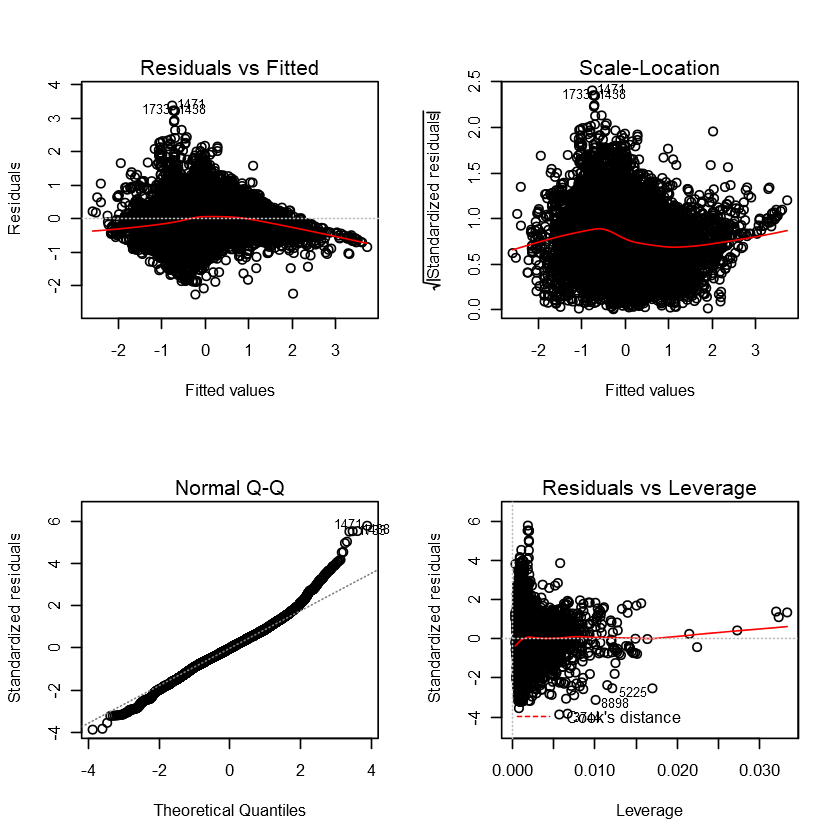

In [37]:
par(mfcol=c(2,2))
plot(new_fit3)

__<span style="color:blue">Findings:</span>__

It can be seen that the removal of outliers has improve the residual plots. The residuals are distributed more evenly and the scale location shows nearly equal variance. Also, the Q-Q plot shows that the residuals are distributed quite normally. 

The new model plots show:
- Residual vs Fitted - The plot shows the residuals are distributed quite evenly around zero. This means that there could be a linear relationship between pm and all the predictors.
- Normal Q-Q - The plot indicate that the residuals are normally distributed.
- Scale-Location - The plot shows the points are spread quite equally (randomly)
- Residuals vs Leverage - The Cook’s distance lines can barely be seen in the plot as all cases are well inside of the Cook’s distance lines. Therefore no influential cases are observed.

### iv) Regularisation: Ridge Regression and Lasso
Ridge regressiona and lasso regression are penalised regression that are able fit a full model with constrains that regularise/shrink the coefficient estimates towards zero. This may prevent the over-fitting on training data which could caused by the large coefficients. Both of the regularisation methods are computed and compared using the `caret` package as `caret`chooses the best tuned parameters automatically. The tuning parameter lambda and the performance of the model will be computed using the cross-validation.


Create a function to compute the ridge regression and lasso, in which:  (James et al (2015, p 244-255))

* train: training data set
* alpha: elasticnet mixing parameter, where **1**=lasso regression and **0**=ridge regression
* test.data: testing data set
* test.label: test true label

In [38]:
# Setup a grid of lambda values and 
lambda <- 10^seq(-5, 10, length = 100)

# function to build the model for lasso and redge regression
build.model <- function(train, alpha, test.data, test.label) {
    set.seed(777)
    reg <- train(
        pm ~., data = train, method = "glmnet",
        trControl = trainControl("cv", number = 5),
        tuneGrid = expand.grid(alpha = alpha, lambda = lambda)
    )
    # Model coefficients
    coef <- coef(reg$finalModel, reg$bestTune$lambda)
    # Make predictions
    predictions <- reg %>% predict(test.data)
    # Model prediction performance
    RMSE <- rmse(predictions, test.label)
    Rsquare <- rsquare(predictions, test.label)
    
    return(list(RMSE=RMSE, rsquared=Rsquare, coef=coef))
}


#### Ridge Regression
Ridge regression is applied to shrink the regression coefficients of the predictor variables (which has minor contribution to the target variable) towards zero. This method however is not able to set those unimportant variables to zero. 

In [39]:
# ridge regression
tic('model fitting')
build.model(train,0,test.data,test.label)
toc()

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

$RMSE
[1] 0.6962476

$rsquared
    15147 
0.3925586 

$coef
9 x 1 sparse Matrix of class "dgCMatrix"
                      1
(Intercept)  0.00798098
ambient      0.35485197
coolant      0.31153307
u_d         -0.17131877
u_q         -0.20834304
motor_speed  0.35793381
torque      -0.05811214
i_d         -0.07064692
i_q         -0.04633402


model fitting: 0.83 sec elapsed


__<span style="color:blue">Findings:</span>__

The above output shows that the RMSE and R-squared values for the ridge regression model on the test data are 0.696 and 39.3 percent, respectively. It can be seen that after shrinking the regression coefficients of the model, the r-square on the test set has decreases. This is because when ridge regression technique is applied in the model, the coefficient estimates is minimised in addition to RSS. As the high values of coefficient estimates are panalised, the effect of the predictor variables on the target variable will be underestimated, thus model complexity decreased. Avoiding the problem of over-fitting, the accuracy of the model has improved as compared to the least-sqaure regression model. 

#### Lasso Regression
Unlike ridge regression, lasso regression is able to shrink the regression coefficients towards exactly zero by penalising the model with penalty term. This means that Lasso also performs feature selection.

In [40]:
# lasso regression
tic('model fitting')
build.model(train,1,test.data,test.label)
toc()

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

$RMSE
[1] 0.7085278

$rsquared
    15147 
0.4482496 

$coef
9 x 1 sparse Matrix of class "dgCMatrix"
                       1
(Intercept)  0.008440335
ambient      0.367058716
coolant      0.324048458
u_d         -0.157734298
u_q         -0.336544869
motor_speed  0.548402830
torque      -0.072204817
i_d          0.039735803
i_q          .          


model fitting: 0.72 sec elapsed


__<span style="color:blue">Findings:</span>__

The above output shows that the RMSE and R-squared values for the Lasso regression model on the test data are 0.7085 and 44.82 percent, respectively. Similar to the ridge regression model, it can be seen that after shrinking the regression coefficients of the model, the r-square on the test set has decreases. This is because when lasso regression technique is applied in the model, the coefficient estimates is minimised in addition to RSS. As the high values of coefficient estimates are panalised, the effect of the predictor variables on the target variable will be underestimated, thus model complexity decreased. Avoiding the problem of over-fitting, the accuracy of the model has improved as compared to the least-sqaure regression model.

Furthermore, Lasso regression does perform feature selection in this model. The coefficcient of the variable <font color="orange">i_q</font> estimates is zero, where it suggests that <font color="orange">i_q</font> is not significant association with the response variable.  

### v) K-nearest Neighbours Regression Model (KNN)

 The KNN regressor works as follows:
<ul>
	<li>Check the value of the K-nearest neighbours</li>
	<li>Returns the average of the neighbours' values</li>
</ul>

##### Steps to build a KNN Model   (Dalpiaz, 2020)

1. Firstly, the required library eg., FNN is imported.
2. The `knn.reg()` function is used to fit the KNN model to the training set.
3. Predict label using the knn model with a range of k (1,5,10,25,50,250,500). Do it on training and testing data set
4. Plot a graph k vs error to find the optimum k value. 
5. Compute the R2 and RMSE on the KNN model with the optimum k value. 
    

In [41]:
# prep dataset for knn regression
# train data
drops1 <- c("stator_yoke","stator_tooth", "stator_winding","profile_id", "pm")
train1 <- trainset[ , !(names(trainset) %in% drops1)]
train.label <- trainset[ , 'pm']

# test data
test <- testset[ , !(names(testset) %in% drops1)]
test.label <- testset[ , 'pm']

In [42]:
### train data
# define values of k to evaluate
tic('finding best k')
k = c(1, 5, 10, 25, 50, 250, 500)
rmse_train <- c()
for (K in k){
    pred2 <- knn.reg(train = train1, test = train1, y = train.label, k = K)
    pred2 <- pred2$pred
    rmse_train <- append(rmse_train, rmse(predicted = pred2, actual = train.label)) #knn
                       }
toc()

finding best k: 2.77 sec elapsed


In [43]:
### test data
rmse_test <- c()
for (K in k){
    pred2 <- knn.reg(train = train1, test = test, y = train.label, k = K)
    pred2 <- pred2$pred
    rmse_test <- append(rmse_test, rmse(predicted = pred2, actual = test.label)) #knn
                       }

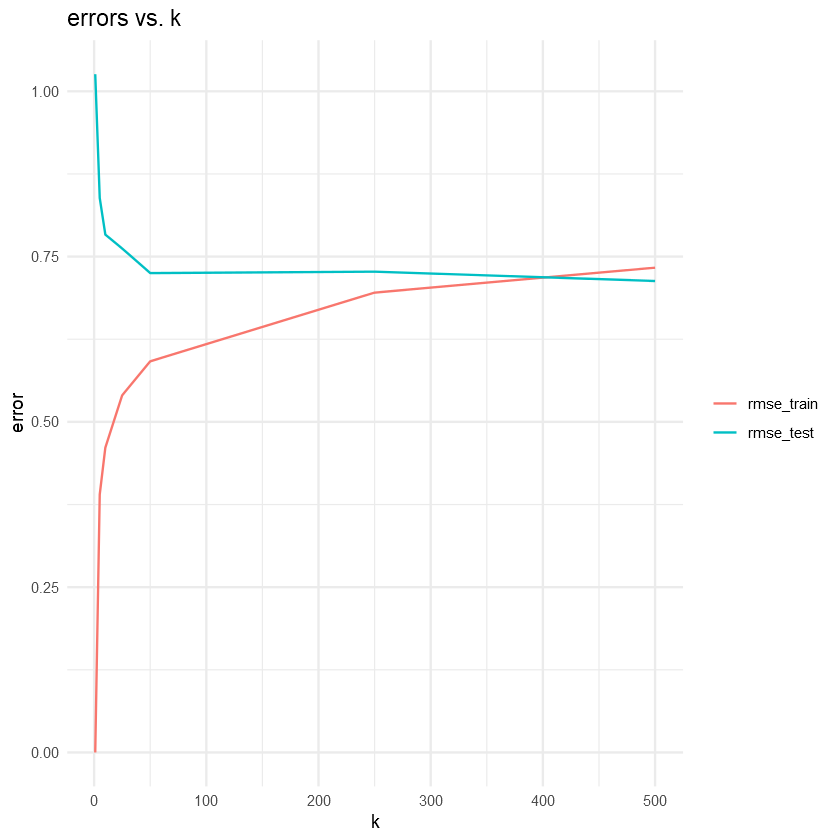

In [44]:
knn_rmse <- data.frame(k,rmse_train, rmse_test)
ridg.m <- melt(knn_rmse, id='k') # reshape for visualization
names(ridg.m) <- c('k', 'type', 'error') 
ggplot(data=ridg.m, aes(x=k, y=error, color=type)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle('errors vs. k')

__<span style="color:blue">Findings:</span>__

When K is small, the decision boundary is overly flexible and finds patterns in the data that do not correspond to the Bayes decision boundary. This corresponds to a classifier that has low bias but very high variance. (overfit). As K grows, the method become less flexible and produces a decision boundary that is close to linear. This corresponds to a low-variance and high-bias classifier. (underfit). The test error comes to almost constant after the k value is large enough (more than 100). Therefore, The optimum k value for the model can be said to be 100.

In [45]:
# check performance of knn with optimum k value
tic("knn label prediction")
pred.knn <- knn.reg(train = train1, test = test, y = train.label, k = 100)
toc()
pred.knn <- pred.knn$pred
rmse.knn <- rmse(predicted = pred.knn, actual = test.label)
r2.knn <- rsquare(pred.knn, test.label) 

pred.knn.train <- knn.reg(train = train1, test = train1, y = train.label, k = 100)
pred.knn.train <- pred.knn.train$pred
rmse.knn.train <- rmse(predicted = pred.knn.train, actual = train.label)
r2.knn.train <- rsquare(pred.knn.train, train.label) 



print(paste("RMSE(on testset) for the knn model is", rmse.knn))
print(paste("R2(on testset) for the knn model is", r2.knn))
print(paste("RMSE(on trainset) for the knn model is", rmse.knn.train))
print(paste("R2(on trainset) for the knn model is", r2.knn.train))

knn label prediction: 0.17 sec elapsed
[1] "RMSE(on testset) for the knn model is 0.715835040401713"
[1] "R2(on testset) for the knn model is 0.832066140165338"
[1] "RMSE(on trainset) for the knn model is 0.637454280368091"
[1] "R2(on trainset) for the knn model is -0.573121534303913"


__<span style="color:blue">Findings:</span>__

The above output shows that the RMSE and R-squared values for the KNN model with the optimum k-value on the test data are 0.713 and 35.04 percent, respectively. Hence, the performance and accuracy of the model generated with KNN are lower than the least-square regression method with interaction terms. Moreover, it has higher computation cost than the least-square regression method (2.55s for finding the best k + 0.18s for fitting the model).

__<span style="color:blue">Conlcusion:</span>__

Linear regression is still more suitable for this dataset. It gives higher accuracy on the testing set and has lower computation cost as compared to KNN model. Linear regression outperforms KNN because the given dataset is simple and linear (as the linear model complies with the linearity assumptions). In linear regression, the value of regression coefficients are able to provide assumption on the significance of the predictor variables, thus it provides better prediction. 

### vi) Random Forest Regression Model

##### Steps to build a Random Forest Model 

1. Firstly, the required library eg., caret and e1071 are imported.
2. Then, create a 5-fold validation to evaluate the performace of the model and train it on 5 folds of smaller datasets. This is controlled by the `trainControl()` function. Random forest is used to train the model and there are some parameters that can be tuned to train a better model. 
3. The model with default parameters is run to see the RMSE and the optimum mtry value as a starting point. The default model is evaluated with a grid search of 5 fold, i.e., trainControl(method="cv", number=5, search="grid").
4. The default model uses ntree=500 and the RMSE was lowest when mtry = 8, and hence the random forest model is then created with mtry = 8.

Note that tree-based model like random forest considers variables sequentially, hence, it is good at finding interaction terms without the need of specifying them. The useful interactions for the prediction will be picked up with random forest, therefore the inclusion of the interaction terms are not needed.

In [46]:
set.seed(7878)##
tr <- trainControl(method = "cv", number = 5, search = "grid")
# Run the default model
set.seed(7878)
rf_default <- train(pm~.,
                    data = train,
                    preProcess = c("center", "scale"),
                    method = "rf",
                    metric = "RMSE",
                    trControl = tr)

rf_default

Random Forest 

9652 samples
   8 predictor

Pre-processing: centered (8), scaled (8) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 7723, 7720, 7721, 7721, 7723 
Resampling results across tuning parameters:

  mtry  RMSE       Rsquared   MAE      
  2     0.3916424  0.8542673  0.2630527
  5     0.3623739  0.8736444  0.2370735
  8     0.3590464  0.8752893  0.2322857

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 8.

In [47]:
# random tree model with default ntree and mtry=8
tic("total")
tic("train control")
set.seed(710)
tr <- trainControl(method = "repeatedcv", number = 5, repeats = 1)
oob = trainControl(method = "oob")
toc()
tic("random forest fitting")
set.seed(710)
fin.mod <- train(pm ~ ., data = train, 
                    preProcess = c("center", "scale"),
                    method = "rf", trControl = tr, tuneGrid = expand.grid(mtry = 8))
toc()
toc()

train control: 0 sec elapsed
random forest fitting: 276.94 sec elapsed
total: 276.94 sec elapsed


In [48]:
# training set
pred_rf_train = predict(fin.mod, newdata=train.data1)
rmse.rf.train <- rmse(predicted = pred_rf_train, actual = train.label)
r2.rf.train <- rsquare(pred_rf_train, train.label)

# testset
pred_rf = predict(fin.mod, newdata=test.data1)
rmse.rf <- rmse(predicted = pred_rf, actual = test.label)
r2.rf <- rsquare(pred_rf, test.label)

print(paste("RMSE (on trainset) for random forest model is", rmse.rf.train))
print(paste("R2 (on trainset) for random forest model is", r2.rf.train))
print(paste("RMSE (on testset) for random forest model is", rmse.rf))
print(paste("R2 (on testset) for random forest model is", r2.rf))

[1] "RMSE (on trainset) for random forest model is 0.141157138544555"
[1] "R2 (on trainset) for random forest model is 0.990749504264768"
[1] "RMSE (on testset) for random forest model is 0.826618650877343"
[1] "R2 (on testset) for random forest model is -0.372479757286109"


__<span style="color:blue">Findings:</span>__

The above output shows that the RMSE and R-squared values for the ramdom forest model with default ntree (ntree = 500) and mtry = 8 on the train data are 0.141 and 99.1%, respectively. The RMSW and R-sqaured values on the test data are 0.827 and -37.25% respectively. The very high r-square and very low rsme in train set compared to the test set imply overfitting of the model (even after hyper-parameter i.e., mtry tuning with 5-fold cross validation). Looking at the r-square and error on the testing data, the performance of the random forest model is very low as compared to the linear model. Furthermore, random forest model has very high computation cost. 

__<span style="color:blue">Conlcusion:</span>__

Linear regression is more suitable for this dataset as it gives higher accuracy on the testing set and has lower computation cost as compared to random forest model. In terms of prediction, a linear regression will always give better performance than a random forests if the model is estimated efficiently and the linearity assumptions actually hold. In this case, the given dataset has provided a linear solution as the linear model complies with the linearity assumptions. Also, ensemble model such as random forest is likely to cause overfitting because of its greediness. In short, linear regression is more suitable for simple and linear model like this, and the non-parametric model like random forest is more suitable to support non linearity and complex model.

### 5. Final Model Selection <a class="anchor" id="sec_5"></a>

The R-squared value and RMSE of the training and testing set of the models are shown as below:

|Model  |Computation Time|R-square  |RMSE                                                                            |
|-----------|-----------|----------|--------------------------------------------------------------------------------------|
|least square regression (full model)|0.01s|0.462|0.7096|
|least square regression (with interaction terms)|0.01s  |0.678|0.598|
|Ridge regression    |0.7s  |0.393|0.696| 
|Lasso regression        |0.73s  |0.448|0.709     |
|KNN        |2.73s  |0.832|0.716|
|Random forest|274.42  |-0.372|0.827                                    |

#### Result Overview
It can be seen that least-square regression model with interaction terms is the best model among the models. It has the smallest RMSE which means that it provide higher accuracy and better performance. It also required the least amount of computation time as compared to other models. 

#### Comparing parametric and non-parametric models
As mentioned above, linear regression model is still more suitable for this dataset. It outperforms other models because the given dataset is simple and linear (as the linear model complies with the linearity assumptions). Furthermore, in linear regression, the value of regression coefficients are able to provide assumption on the significance of the predictor variables, thus it provides better prediction. In short, linear regression is more suitable for simple and linear model like this, the non-parametric model like random forest and KNN are more suitable to support non linearity and complex model.

#### Comparing the linear regression models
In Ridge and Lasso regression model, it can be seen that after shrinking the regression coefficients of the model, the r-square on the test set has decreases. This is because the coefficient estimates is minimised in addition to RSS. As the high values of coefficient estimates are panalised, the effect of the predictor variables on the target variable will be underestimated, thus model complexity decreased. This prevent the over-fitting problem, thus the accuracy of the model has improved as compared to the least-sqaure regression model. Furthermore, Lasso regression performs feature selection by taking off variable i_q. This cause the model to be further simplify. However, sometimes simple model will not give high accuracy on the testing set. 

From the EDA above, it can be seen that the effect of some of the variable depends on the value of another variables. In other words, the model may create multicoliinearity. Therefore, try to fit linear regression models with interaction effects in this case provides possibility to fit a wider variety of function, thus the model will fit better and achieve better performance. 

#### Rebuild Final Model

Least square model with interaction terms

In [49]:
#lm with interaction term
new_fit3 <- update(my_fit, . ~ . + torque:u_d + torque:i_q + u_q:motor_speed + i_d:motor_speed + u_d:i_d + u_d:motor_speed + torque:u_q + motor_speed:torque)
summary(new_fit3)


Call:
lm(formula = pm ~ ambient + coolant + u_d + u_q + motor_speed + 
    torque + i_d + i_q + u_d:torque + torque:i_q + u_q:motor_speed + 
    motor_speed:i_d + u_d:i_d + u_d:motor_speed + u_q:torque + 
    motor_speed:torque, data = myData)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2566 -0.3557 -0.0068  0.3435  3.3831 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         3.516214   0.072105  48.765  < 2e-16 ***
ambient             0.278196   0.007161  38.847  < 2e-16 ***
coolant             0.141755   0.007647  18.536  < 2e-16 ***
u_d                -3.471787   0.203242 -17.082  < 2e-16 ***
u_q                -8.290968   0.143027 -57.968  < 2e-16 ***
motor_speed        10.261909   0.210592  48.729  < 2e-16 ***
torque             -5.689857   0.308471 -18.445  < 2e-16 ***
i_d                 5.542701   0.101344  54.692  < 2e-16 ***
i_q                 2.523239   0.230967  10.925  < 2e-16 ***
u_d:torque         -0.339469   0.014

In [50]:
# RMSE and R2 on the testing data
pred5 <- predict(new_fit3, newdata = test.data1)
rmse.lm5 <- rmse(predicted = pred5, actual = test.label)
r2.lm5 <- rsquare(pred5, test.label)
print(paste("RMSE(on testset) for the least-square regression model with interaction term is", rmse.lm5))
print(paste("R2(on testset) for the least-square regression model with interaction term is", r2.lm5))

[1] "RMSE(on testset) for the least-square regression model with interaction term is 0.59782135329019"
[1] "R2(on testset) for the least-square regression model with interaction term is 0.678024138008158"


## 6. Conclusion<a class="anchor" id="sec_7"></a>

In conclusion, a balance goodness of fit together with simplicity is the key for a good model selection. Other than the performance and simplicity of the model, the computation time also sometimes need to be considered for working efficiency. It is vital to always apply statistical analytics, theorectical understanding of the variables, and some practical knowledge in the model selection process. 

## 7. References <a class="anchor" id="sec_8"></a>

* Lan,D.(2021). FIT5149 - house_price_prediction [Class handout]. Retrieved from http://moodle.vle.monash.edu.au

* James, G., Witten, D., Hastie, T., Tibshirani, R. (2015). *An Introduction to Statistical Learning with Applications in R*.<br>Retrieved from: http://www-bcf.usc.edu/~gareth/ISL/
* Kassambara, A., 2018. Machine learning essentials. 1st ed.
* Dalpiaz, D. (2020). R for Statistical Learning (1st ed.).